In [1]:
# Importing the libraries
import numpy as np

import matplotlib.pyplot as plt

import pandas as pd

from sklearn.impute import SimpleImputer

In [2]:
df = pd.read_csv('listings_prepar.csv', sep=',')
df

,number_of_reviews,calculated_host_listings_count,availability_365,datetime_diff,room_type=0,room_type=1,room_type=2,room_type=3,price
0,65.0,1.0,53.0,412.0,0.0,0.0,1.0,0.0,70.0
1,33.0,2.0,48.0,828.0,0.0,0.0,1.0,0.0,17.0
2,2.0,1.0,354.0,1205.0,1.0,0.0,0.0,0.0,80.0
3,64.0,1.0,301.0,471.0,1.0,0.0,0.0,0.0,115.0
4,136.0,1.0,337.0,468.0,0.0,0.0,1.0,0.0,25.0
...,...,...,...,...,...,...,...,...,...
7665,36.0,2.0,116.0,464.0,1.0,0.0,0.0,0.0,30.0
7666,43.0,1.0,344.0,464.0,0.0,0.0,1.0,0.0,50.0
7667,58.0,2.0,94.0,408.0,0.0,0.0,1.0,0.0,75.0
7668,67.0,1.0,331.0,425.0,1.0,0.0,0.0,0.0,60.0


In [3]:
df['lux_pr'] = [int(i > 100) for i in df['price']]
df

,number_of_reviews,calculated_host_listings_count,availability_365,datetime_diff,room_type=0,room_type=1,room_type=2,room_type=3,price,lux_pr
0,65.0,1.0,53.0,412.0,0.0,0.0,1.0,0.0,70.0,0
1,33.0,2.0,48.0,828.0,0.0,0.0,1.0,0.0,17.0,0
2,2.0,1.0,354.0,1205.0,1.0,0.0,0.0,0.0,80.0,0
3,64.0,1.0,301.0,471.0,1.0,0.0,0.0,0.0,115.0,1
4,136.0,1.0,337.0,468.0,0.0,0.0,1.0,0.0,25.0,0
...,...,...,...,...,...,...,...,...,...,...
7665,36.0,2.0,116.0,464.0,1.0,0.0,0.0,0.0,30.0,0
7666,43.0,1.0,344.0,464.0,0.0,0.0,1.0,0.0,50.0,0
7667,58.0,2.0,94.0,408.0,0.0,0.0,1.0,0.0,75.0,0
7668,67.0,1.0,331.0,425.0,1.0,0.0,0.0,0.0,60.0,0


In [4]:
df = df.drop(columns = ['price'], );
df = df.drop(columns = ['room_type=0'], );
df = df.drop(columns = ['room_type=1'], );
df = df.drop(columns = ['room_type=2'], );
df = df.drop(columns = ['room_type=3'], );

In [5]:
#Statistics
df.describe()

,number_of_reviews,calculated_host_listings_count,availability_365,datetime_diff,lux_pr
count,7670.000000,7670.000000,7670.000000,7670.000000,7670.000000
mean,52.600391,3.172229,140.900782,591.367927,0.135854
std,49.952248,3.738650,128.069914,326.394433,0.342656
min,1.000000,1.000000,0.000000,398.000000,0.000000
25%,10.000000,1.000000,9.000000,410.000000,0.000000
50%,38.000000,1.000000,104.000000,450.000000,0.000000
75%,81.000000,4.000000,271.000000,591.000000,0.000000
max,199.000000,19.000000,365.000000,3217.000000,1.000000


In [6]:
#splitting test and train sets 
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

In [7]:
#feature scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler().fit(X_train)
X_train = sc_X.transform(X_train)
X_test = sc_X.transform(X_test)

In [8]:
#baseline model
import statsmodels.api as sm
lr = sm.Logit(y_train, X_train).fit()
print(lr.summary2())

Optimization terminated successfully.
         Current function value: 0.687216
         Iterations 4
                         Results: Logit
Model:              Logit            Pseudo R-squared: -0.720   
Dependent Variable: y                AIC:              8441.5144
Date:               2020-10-21 15:22 BIC:              8468.4021
No. Observations:   6136             Log-Likelihood:   -4216.8  
Df Model:           3                LL-Null:          -2451.9  
Df Residuals:       6132             LLR p-value:      1.0000   
Converged:          1.0000           Scale:            1.0000   
No. Iterations:     4.0000                                      
-------------------------------------------------------------------
       Coef.     Std.Err.       z       P>|z|      [0.025    0.975]
-------------------------------------------------------------------
x1    -0.0456      0.0286    -1.5962    0.1104    -0.1016    0.0104
x2     0.1293      0.0267     4.8470    0.0000     0.0770    0.181

In [9]:
#feature selection
X_train = X_train[:,[1,2]]
X_test = X_test[:,[1,2]]

In [10]:
from sklearn.linear_model import LogisticRegression
slr = LogisticRegression(random_state = 13).fit(X_train, y_train)

In [11]:
y_pred = slr.predict(X_test)
slr.score(X_test,y_test)

0.8689700130378096

In [12]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1333    0]
 [ 201    0]]


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


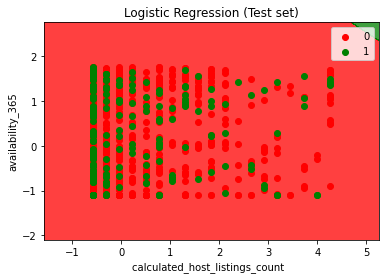

In [13]:
#plot
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, slr.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('calculated_host_listings_count  ')
plt.ylabel('availability_365')
plt.legend()
plt.show()

In [14]:
#output file
import pickle
obj = {'X_train': X_train, 'X_test': X_test,'y_train': y_train,'y_test': y_test}
output = open('data4.pkl', 'wb')
pickle.dump(obj, output, 2)
output.close()